In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from itertools import combinations
%matplotlib inline
sns.set_theme(style = 'whitegrid', palette = 'tab10')

***
# Раздел 0. Загрузка данных, осмотр фрейма.
Загружаем и смотрим на датафрейм

In [2]:
students = pd.read_csv('stud_math.csv')
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Большинство столбцов - это на самом деле качественные переменные. Если бы датафрейм был большого объёма, то имело бы смысл перевести категории из строкового формата
в числовой и использовать таблицу трансляции для экономии места в памяти. Тут мы этого делать не будем, потому что фрейм маленький.

In [3]:
students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Сейчас надо разделить переменные на качественные номинальные (категориальные), качественные полуколичественные и количественные.
Можно руководствоваться описанием проекта, а можно посмотреть сколько уникальных занчений каждая переменная принимает. Следует учитывать, что могут быть мусорные значения, которые будут раздувать счёт.

In [5]:
students.nunique().sort_values()

school                  2
sex                     2
romantic                2
address                 2
famsize                 2
Pstatus                 2
internet                2
higher                  2
nursery                 2
activities              2
paid                    2
famsup                  2
schoolsup               2
guardian                3
studytime, granular     4
failures                4
studytime               4
traveltime              4
reason                  4
Fjob                    5
Mjob                    5
Medu                    5
freetime                5
goout                   5
health                  5
Fedu                    6
famrel                  6
age                     8
score                  18
absences               36
dtype: int64

Мы видим, что к категориальным переменным можно отнести все, кроме количества пропусков, оценки за экзамен, возраста. Можно даже возраст отнести к полуколичественным переменным.
В дальнейшем мы поступим именно так. В некоторых столбцах имеются пропуски в виде NaN, эти пропуски мы будем заполнять или убирать для каждого типа столбцов по-разному. 

***

# Раздел 1. Подготовка качественных номинативных переменных.

In [6]:
# введём список качественных номинальных переменных
cat_nom_ls = ['school', 'sex', 'address', 'famsize', 'Pstatus',
              'Mjob', 'Fjob', 'reason','guardian', 'schoolsup', 
              'famsup', 'paid', 'activities', 'nursery',
              'higher', 'internet', 'romantic']

Посмотрим, какие уникальные значения принимает каждая переменная

In [7]:
for col in cat_nom_ls:
    print(f'Переменная {col} принимает значения: {", ".join(map(str, students[col].unique()))} \n')

Переменная school принимает значения: GP, MS 

Переменная sex принимает значения: F, M 

Переменная address принимает значения: U, nan, R 

Переменная famsize принимает значения: nan, GT3, LE3 

Переменная Pstatus принимает значения: A, nan, T 

Переменная Mjob принимает значения: at_home, health, other, services, teacher, nan 

Переменная Fjob принимает значения: teacher, other, nan, health, services, at_home 

Переменная reason принимает значения: course, other, home, reputation, nan 

Переменная guardian принимает значения: mother, father, other, nan 

Переменная schoolsup принимает значения: yes, no, nan 

Переменная famsup принимает значения: no, yes, nan 

Переменная paid принимает значения: no, nan, yes 

Переменная activities принимает значения: no, yes, nan 

Переменная nursery принимает значения: yes, no, nan 

Переменная higher принимает значения: yes, nan, no 

Переменная internet принимает значения: nan, yes, no 

Переменная romantic принимает значения: no, nan, yes 



Из проблемных значений только nan, которые мы заменим на None. Yes\no заменим на True\False

In [8]:
# Yes и No, там где они есть, заменим на True, False, а там где NaN или пустая строка - на None
classifier = {'yes':True, 'no': False}
def fix_yes_no(value):
    if pd.isnull(value) or value == '':
        return None
    elif value.lower() in classifier.keys():
        return classifier[value]
    else:
        return value

In [9]:
for col in cat_nom_ls:
    students[col] = students[col].apply(fix_yes_no) 

Введём функции для быстрого анализа качественных переменных: для номинальных - построение гистограмм и пайчартов, для полуколичественных - построение "ящиков с усами"

In [10]:
def quick_look(feature):
    '''
    Функция строит гистограмму и пайчарт для качественной номинальной переменной.
    
    feature - принимает в виде pandas.Series, то есть необходимо в аргументе указывать
    не весь фрейм, а конкретный его столбец.
    '''
    fig, axes = plt.subplots(1, 2, figsize = (8,4))
    fig.suptitle(f'Счёт значений переменной {feature.name}')
    feature_dist = feature.value_counts()
    feature_dist.plot(ax = axes[0], kind = 'bar')
    feature_dist.plot(ax = axes[1], kind = 'pie', ylabel = '', autopct='%1.0f%%')
    
    
def smallbox(feature):
    '''
    Маленький ящик с усами для одной пременной.
    
    feature - принимает в виде pandas.Series, то есть необходимо в аргументе указывать
    не весь фрейм, а конкретный его столбец.
    '''
    fig = plt.figure(figsize = (12,1.5))
    sns.boxplot(data = feature, orient = 'h').set_title(f'Значения признака {feature.name}')

Смотрим на каждую колонку из списка

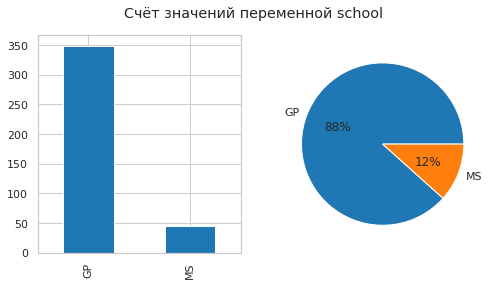

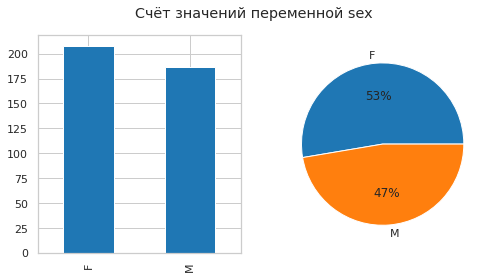

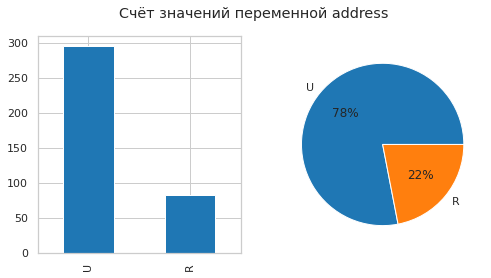

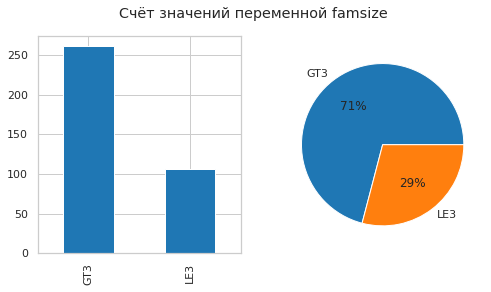

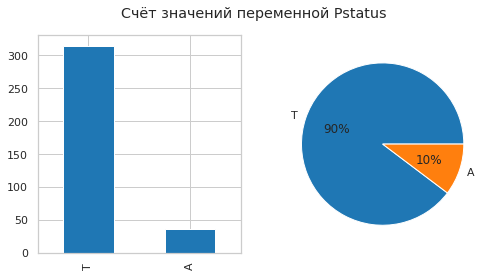

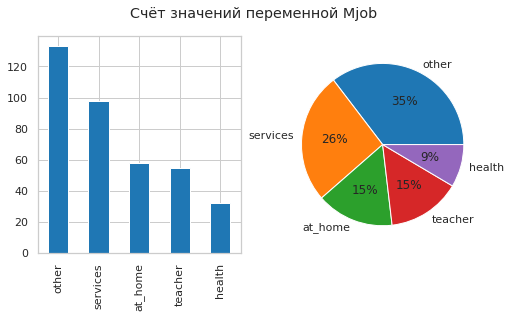

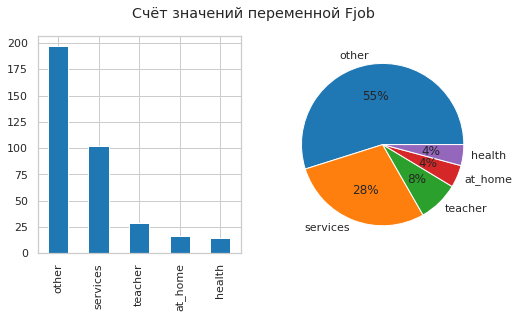

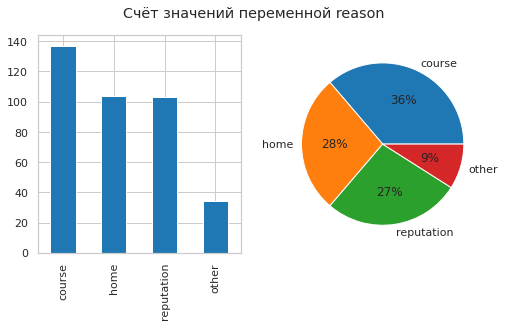

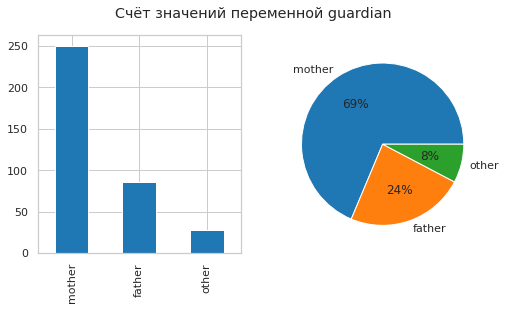

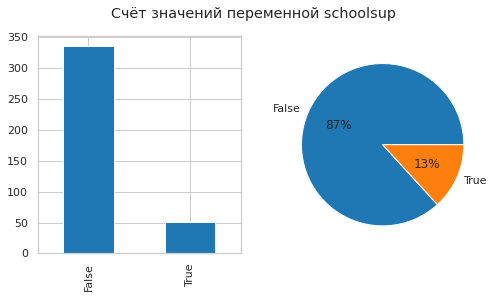

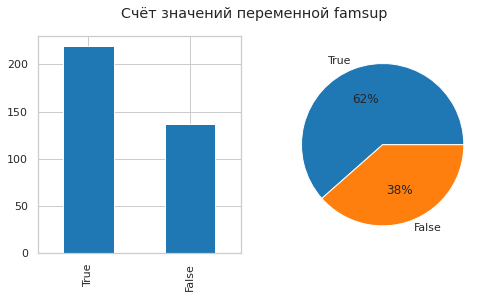

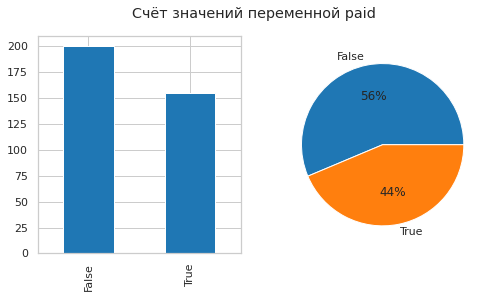

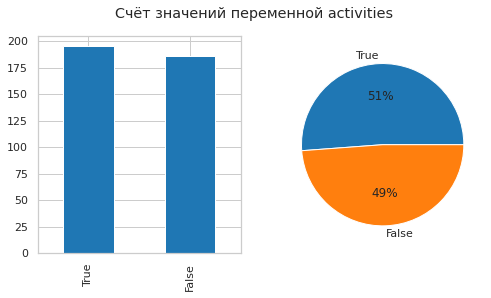

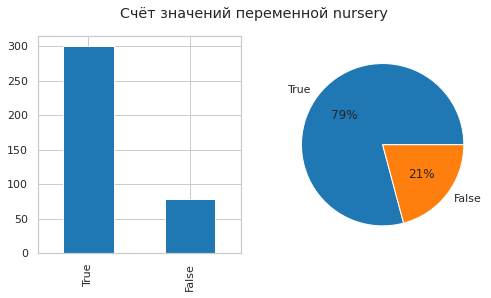

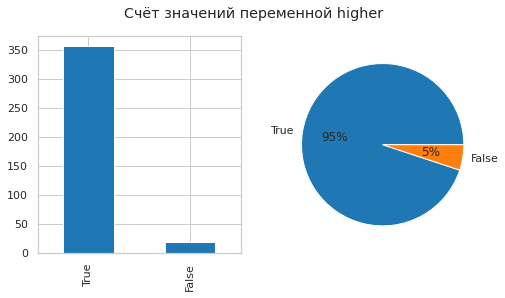

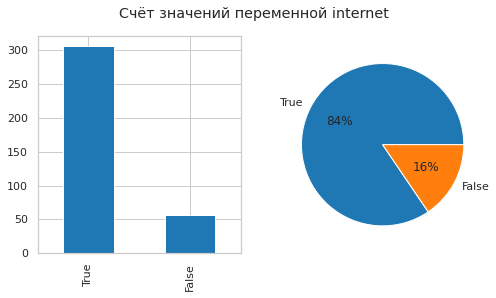

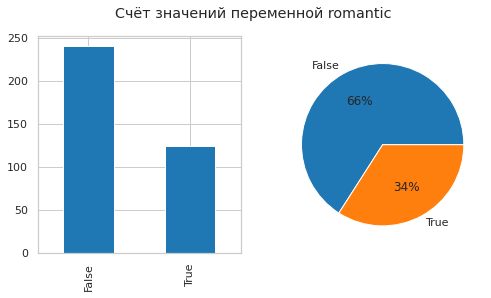

In [11]:
for feature in cat_nom_ls:
    quick_look(students[feature])

Можно сделать вывод о достаточной предобработке данных качественных номинальных переменных.
Dummy-переменные не создаём, пока без надобности.

***
# Раздел 2. Подготовка и осмотр полуколичественных переменных

In [12]:
# введём список качественных полуколичественных переменных
cat_ord_ls = ['Medu', 'Fedu', 'traveltime', 'studytime',
              'famrel', 'freetime', 'goout', 'health', 'failures']

Посмотрим, какие значения переменные принимают

In [13]:
for col in cat_ord_ls:
    print(f'Переменная {col} принимает значения: {", ".join(map(str, students[col].unique()))} \n')

Переменная Medu принимает значения: 4.0, 1.0, 3.0, 2.0, nan, 0.0 

Переменная Fedu принимает значения: 4.0, 1.0, 2.0, 3.0, 40.0, nan, 0.0 

Переменная traveltime принимает значения: 2.0, 1.0, 3.0, nan, 4.0 

Переменная studytime принимает значения: 2.0, 3.0, 1.0, nan, 4.0 

Переменная famrel принимает значения: 4.0, 5.0, 3.0, nan, -1.0, 2.0, 1.0 

Переменная freetime принимает значения: 3.0, 2.0, 4.0, 1.0, 5.0, nan 

Переменная goout принимает значения: 4.0, 3.0, 2.0, 1.0, 5.0, nan 

Переменная health принимает значения: 3.0, 5.0, 1.0, 2.0, 4.0, nan 

Переменная failures принимает значения: 0.0, 3.0, nan, 2.0, 1.0 



Подтягиваем значения, выходящие за пределы шкал к этим пределам шкал, NaN меняем на None. 

In [14]:
#список признаков, которые могут принимать значения от 1 до 4
one_to_four = ['Medu', 'Fedu', 'traveltime', 'studytime']
#список признаков, которые могут принимать значения от 1 до 5
one_to_five = ['famrel', 'freetime', 'goout', 'health']

def fix_limits(x, lower_limit, upper_limit):
    '''
    Функция притягивает x к upper_limit, если он болше чем этот предел,
    подтягивает x к lower_limit, если x меньше него,
    возвращает None, если x - это nan
    '''
    if pd.isnull(x):
        return None
    elif x in range(lower_limit, upper_limit+1):
        return x
    else:
        return min(upper_limit,max(x,lower_limit))

for feature in one_to_four:
    students[feature] = students[feature].apply(fix_limits, args=(1,4))

for feature in one_to_five:
    students[feature] = students[feature].apply(fix_limits, args=(1,5))

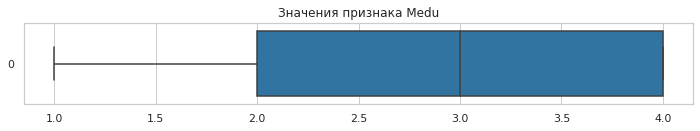

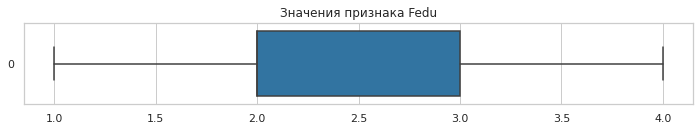

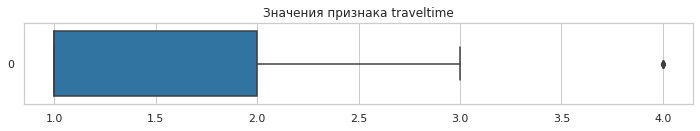

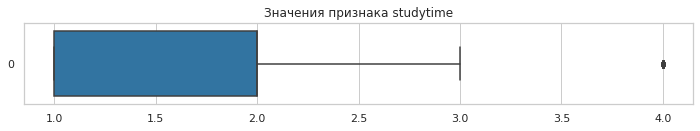

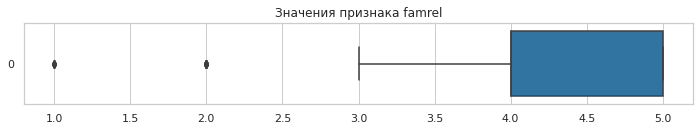

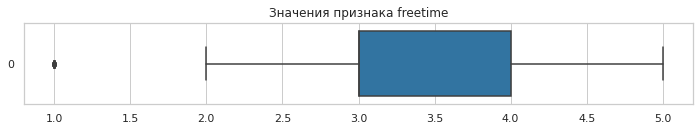

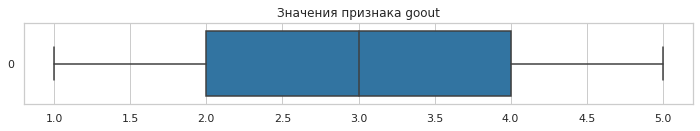

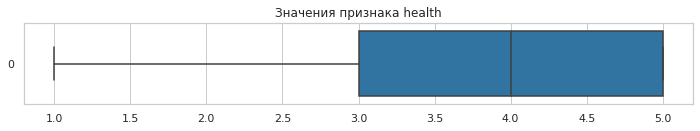

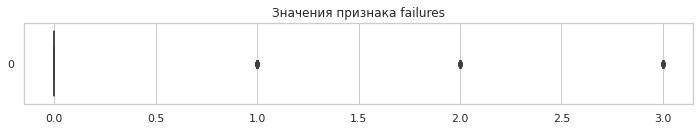

In [15]:
# проверяем
for var in cat_ord_ls:
    smallbox(students[var])

Некоторые из значений этих переменных указаны на боксплотах как выбросы, но таковыми мы их считать не будем.

На данном этапе подготовку качественных переменных можно считать законченной. 

***
# Раздел 3. Подготовка количественных переменных

In [16]:
# Список количественных переменных
quan_features = set(students.columns) - set(cat_nom_ls) - set(cat_ord_ls)
quan_features = list(quan_features)
quan_features

['absences', 'studytime, granular', 'age', 'score']

Посмотрим, какие значения принимают эти переменные

In [17]:
for col in quan_features:
    print(f'Переменная {col} принимает значения: {", ".join(map(str, students[col].unique()))}')

Переменная absences принимает значения: 6.0, 4.0, 10.0, 2.0, 0.0, 16.0, nan, 14.0, 7.0, 8.0, 25.0, 12.0, 54.0, 18.0, 26.0, 20.0, 56.0, 24.0, 28.0, 5.0, 13.0, 15.0, 22.0, 3.0, 385.0, 21.0, 1.0, 75.0, 30.0, 19.0, 9.0, 11.0, 38.0, 40.0, 23.0, 17.0, 212.0
Переменная studytime, granular принимает значения: -6.0, -9.0, -3.0, nan, -12.0
Переменная age принимает значения: 18, 17, 15, 16, 19, 22, 20, 21
Переменная score принимает значения: 30.0, 50.0, 75.0, 55.0, 95.0, 45.0, 60.0, 70.0, 80.0, 25.0, 40.0, 85.0, 90.0, 65.0, 100.0, 35.0, 0.0, nan, 20.0


Значения NaN есть у переменной studytime, granular, но поскольку вообще непонятно, что это за переменная, то мы пока её не будем исправлять. Посмотрим нужна ли она вообще.

Значения nan у score мы удалим. Это целевая переменная и те записи, где её значения нет, для нас не имеют смысла.

### Признак absences

In [18]:
# Количество пропущенных занятий студентом. Выбросы есть только сверху, мода - 0 пропущенных занятий и она же совпадает с нижним квартилем.
descr = students['absences'].describe()
display(descr)
IQR = descr['75%'] - descr['25%']
upper_quantile = descr['75%']

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

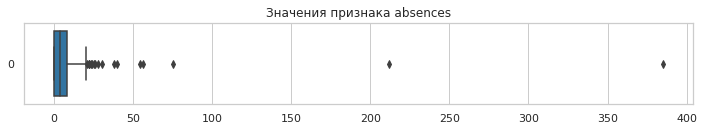

In [19]:
smallbox(students['absences'])

Посмотрим топ-10 значений

In [20]:
students['absences'].value_counts().iloc[0:10]

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
Name: absences, dtype: int64

Отбросим верхние выбросы, большие чем верхний квартиль + 1.5*IQR

In [21]:
students = students.query('absences < @upper_quantile + 1.5*@IQR')

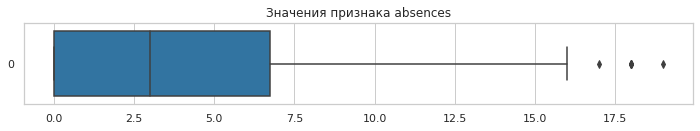

In [22]:
smallbox(students['absences'])

Посмотрим гистограмму распределения

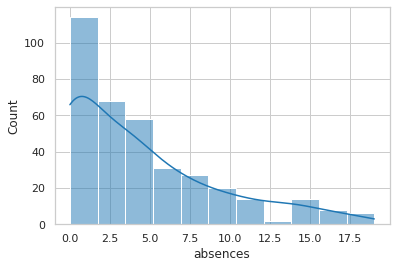

In [23]:
sns.histplot(students, x = 'absences', kde = True)
plt.show()

Даже на глаз видно, то распределение не нормальное. Но всё таки проверим его на нормальность.

Выдвинем гипотезу: распределение переменной absence - нормальное, с уровнем значимости 5%. Альтернативная гипотеза - данные не имеют нормального распределения.
Проверим эту гипотезу при помощи критерия согласия Пирсона.

In [24]:
stat, p = scipy.stats.normaltest(students['absences'])
print(f'Статистика для распределения absences - {stat}, p-value - {p}')

Статистика для распределения absences - 55.159581178870305, p-value - 1.0525655095533786e-12


Вывод - мы вынуждены отвергнуть нулевую гипотезу ($ p < \alpha $), то есть распределение не является нормальным. 

### Признак failures

In [25]:
students['failures'].value_counts()

0.0    275
1.0     41
3.0     14
2.0     13
Name: failures, dtype: int64

In [26]:
students['failures'].describe()

count    343.000000
mean       0.317784
std        0.734213
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

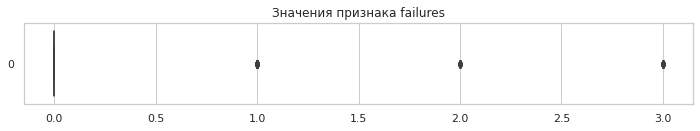

In [27]:
smallbox(students['failures'])

Доминирует значение 0, по сути это и мода, и все квартили оказались на нуле, а всё, что не 0 - то выброс. Но если эти выбросы мы удалим, то весь столбец потеряет какой-либо смысл, 
а количество неудачных попыток может быть связано с очередной оценкой. Поэтому эти выбросы мы не удаляем.

Распределение точно не нормальное.

### Признак age

In [28]:
students['age'].describe()

count    362.000000
mean      16.643646
std        1.262094
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [29]:
students['age'].value_counts().sort_index()

15    79
16    98
17    87
18    76
19    18
20     2
21     1
22     1
Name: age, dtype: int64

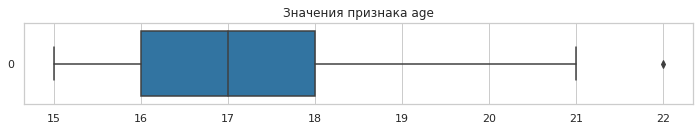

In [30]:
smallbox(students['age'])

Формально 22 года - выброс, однако это явно не ошибка в данных, значение вполне адекватное, поэтому из выборки его исключать не будем.

Посмотрим гистограмму

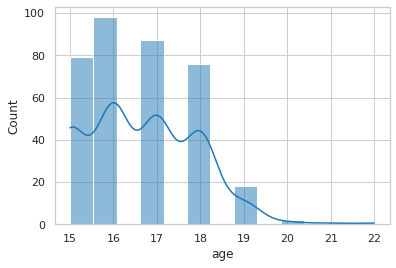

In [31]:
sns.histplot(students, x = 'age', kde = True)
plt.show()

Распределения явно не нормальное, но посмотрим тестом.

In [32]:
stat, p = scipy.stats.normaltest(students['age'])
print(f'Статистика для распределения age - {stat}, p-value - {p}')

Статистика для распределения age - 14.626036324640907, p-value - 0.0006668014968124369


$p < \alpha$, отвергаем гипотезу о нормальности.

### Признак score.
Этот признак можно рассматривать как целевой параметр - именно он будет тем параметром, с которым мы будем пытаться коррелировать другие.

In [33]:
students['score'].value_counts().sort_index()

0.0      36
25.0      7
30.0     14
35.0      9
40.0     25
45.0     23
50.0     53
55.0     42
60.0     28
65.0     28
70.0     27
75.0     31
80.0     16
85.0      3
90.0      9
95.0      5
100.0     1
Name: score, dtype: int64

In [34]:
students[students['score'].apply(pd.isnull)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,...,-6.0,True,False,False,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,...,-9.0,True,True,True,4.0,4.0,4.0,3.0,0.0,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,True,True,False,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,...,-6.0,True,True,False,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,None,GT3,T,1.0,1.0,other,services,...,-6.0,True,True,False,5.0,4.0,4.0,2.0,8.0,NaN


In [35]:
# Удаляем все значения с NaN
students.dropna(subset = ['score'], inplace = True)

Смотрим выбросы

In [36]:
students.dropna(subset = ['score'], inplace = True)

In [37]:
descr = students['score'].describe()
display(descr)
IQR = descr['75%'] - descr['25%']
upper_quantile = descr['75%']
lower_quantile = descr['25%']

count    357.000000
mean      51.932773
std       23.051383
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

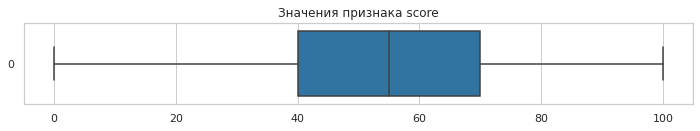

In [38]:
smallbox(students['score'])

Нулевые значения признака score содержатся в немалом количестве, они очень подозрительные, но формально не являются выбросами, каковыми мы их и не считаем.
Поставим эксперимент - посмотрим как будет влиять учёт этих нулевых значений на корреляции. Может быть, нулевой результат надо интерпретировать как неявку на экзамен, а
не как полный провал?
Создадим второй фрейм, в котором нулевые значения score будут дропнуты.

In [39]:
students_nozeros = students.query('score > 0')

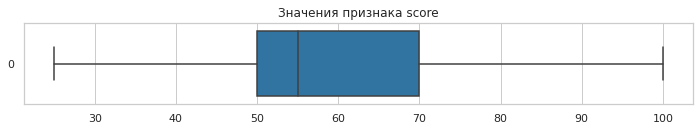

In [40]:
smallbox(students_nozeros['score'])

Посмотрим распределения

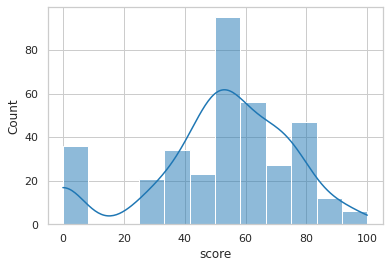

In [41]:
sns.histplot(students, x = 'score', kde = True)
plt.show()

Для случая, когда нули включены в выборку, распрделение получается смещённым влево, исключительно благодаря этим нулям.

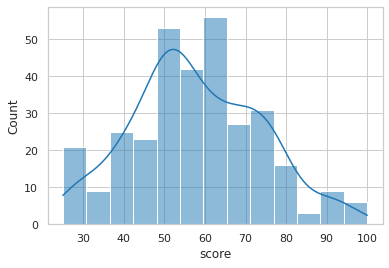

In [42]:
sns.histplot(students_nozeros, x = 'score', kde = True)
plt.show()

**Выдвинем гипотезу:** распределение в случае исключения нуля - нормальное, с уровнем значимости 5%. Альтернативная гипотеза - данные не имеют нормального распределения.
Проверим эту гипотезу при помощи критерия согласия Пирсона.

In [43]:
stat, p = scipy.stats.normaltest(students['score'])
stat_nozeros, p_nozeros = scipy.stats.normaltest(students_nozeros['score'])

print(f'Статистика для распределения с нулями - {stat}, p-value - {p}')
print(f'Статистика для распределения без нулей - {stat_nozeros}, p-value - {p_nozeros}')

Статистика для распределения с нулями - 31.261500726775072, p-value - 1.6279886365840878e-07
Статистика для распределения без нулей - 4.296787455109575, p-value - 0.11667141341796164


Вывод - при включении в выборку нулевых значений мы вынуждены отвергнуть нулевую гипотезу ($ p < \alpha $), то есть распределение не является нормальным. 
Если нули исключить, то $p > \alpha$ и мы не отвергаем начальную гипотезу, распределение можно считать нормальным.
Логично предположить (но без доказательства), что на оценку за экзамен влияет множество различных факторов (покажем в разделе 4), то есть оценку можно рассматривать как сумму случайных величин примерно одинаковых масштабов. **_Значит, по центральной предельной теореме, оценка будет распределена нормально, и есть основания считать, что нулевые значения оценки - это какие-то отклонения в данных, возможно вызванные некорректным сбором._**

***
# Раздел 4. Корреляции переменных.
## 4.1. Обзор корреляции переменных.
Построим графики и матрицу корелляций полуколичественных и количественных переменных.

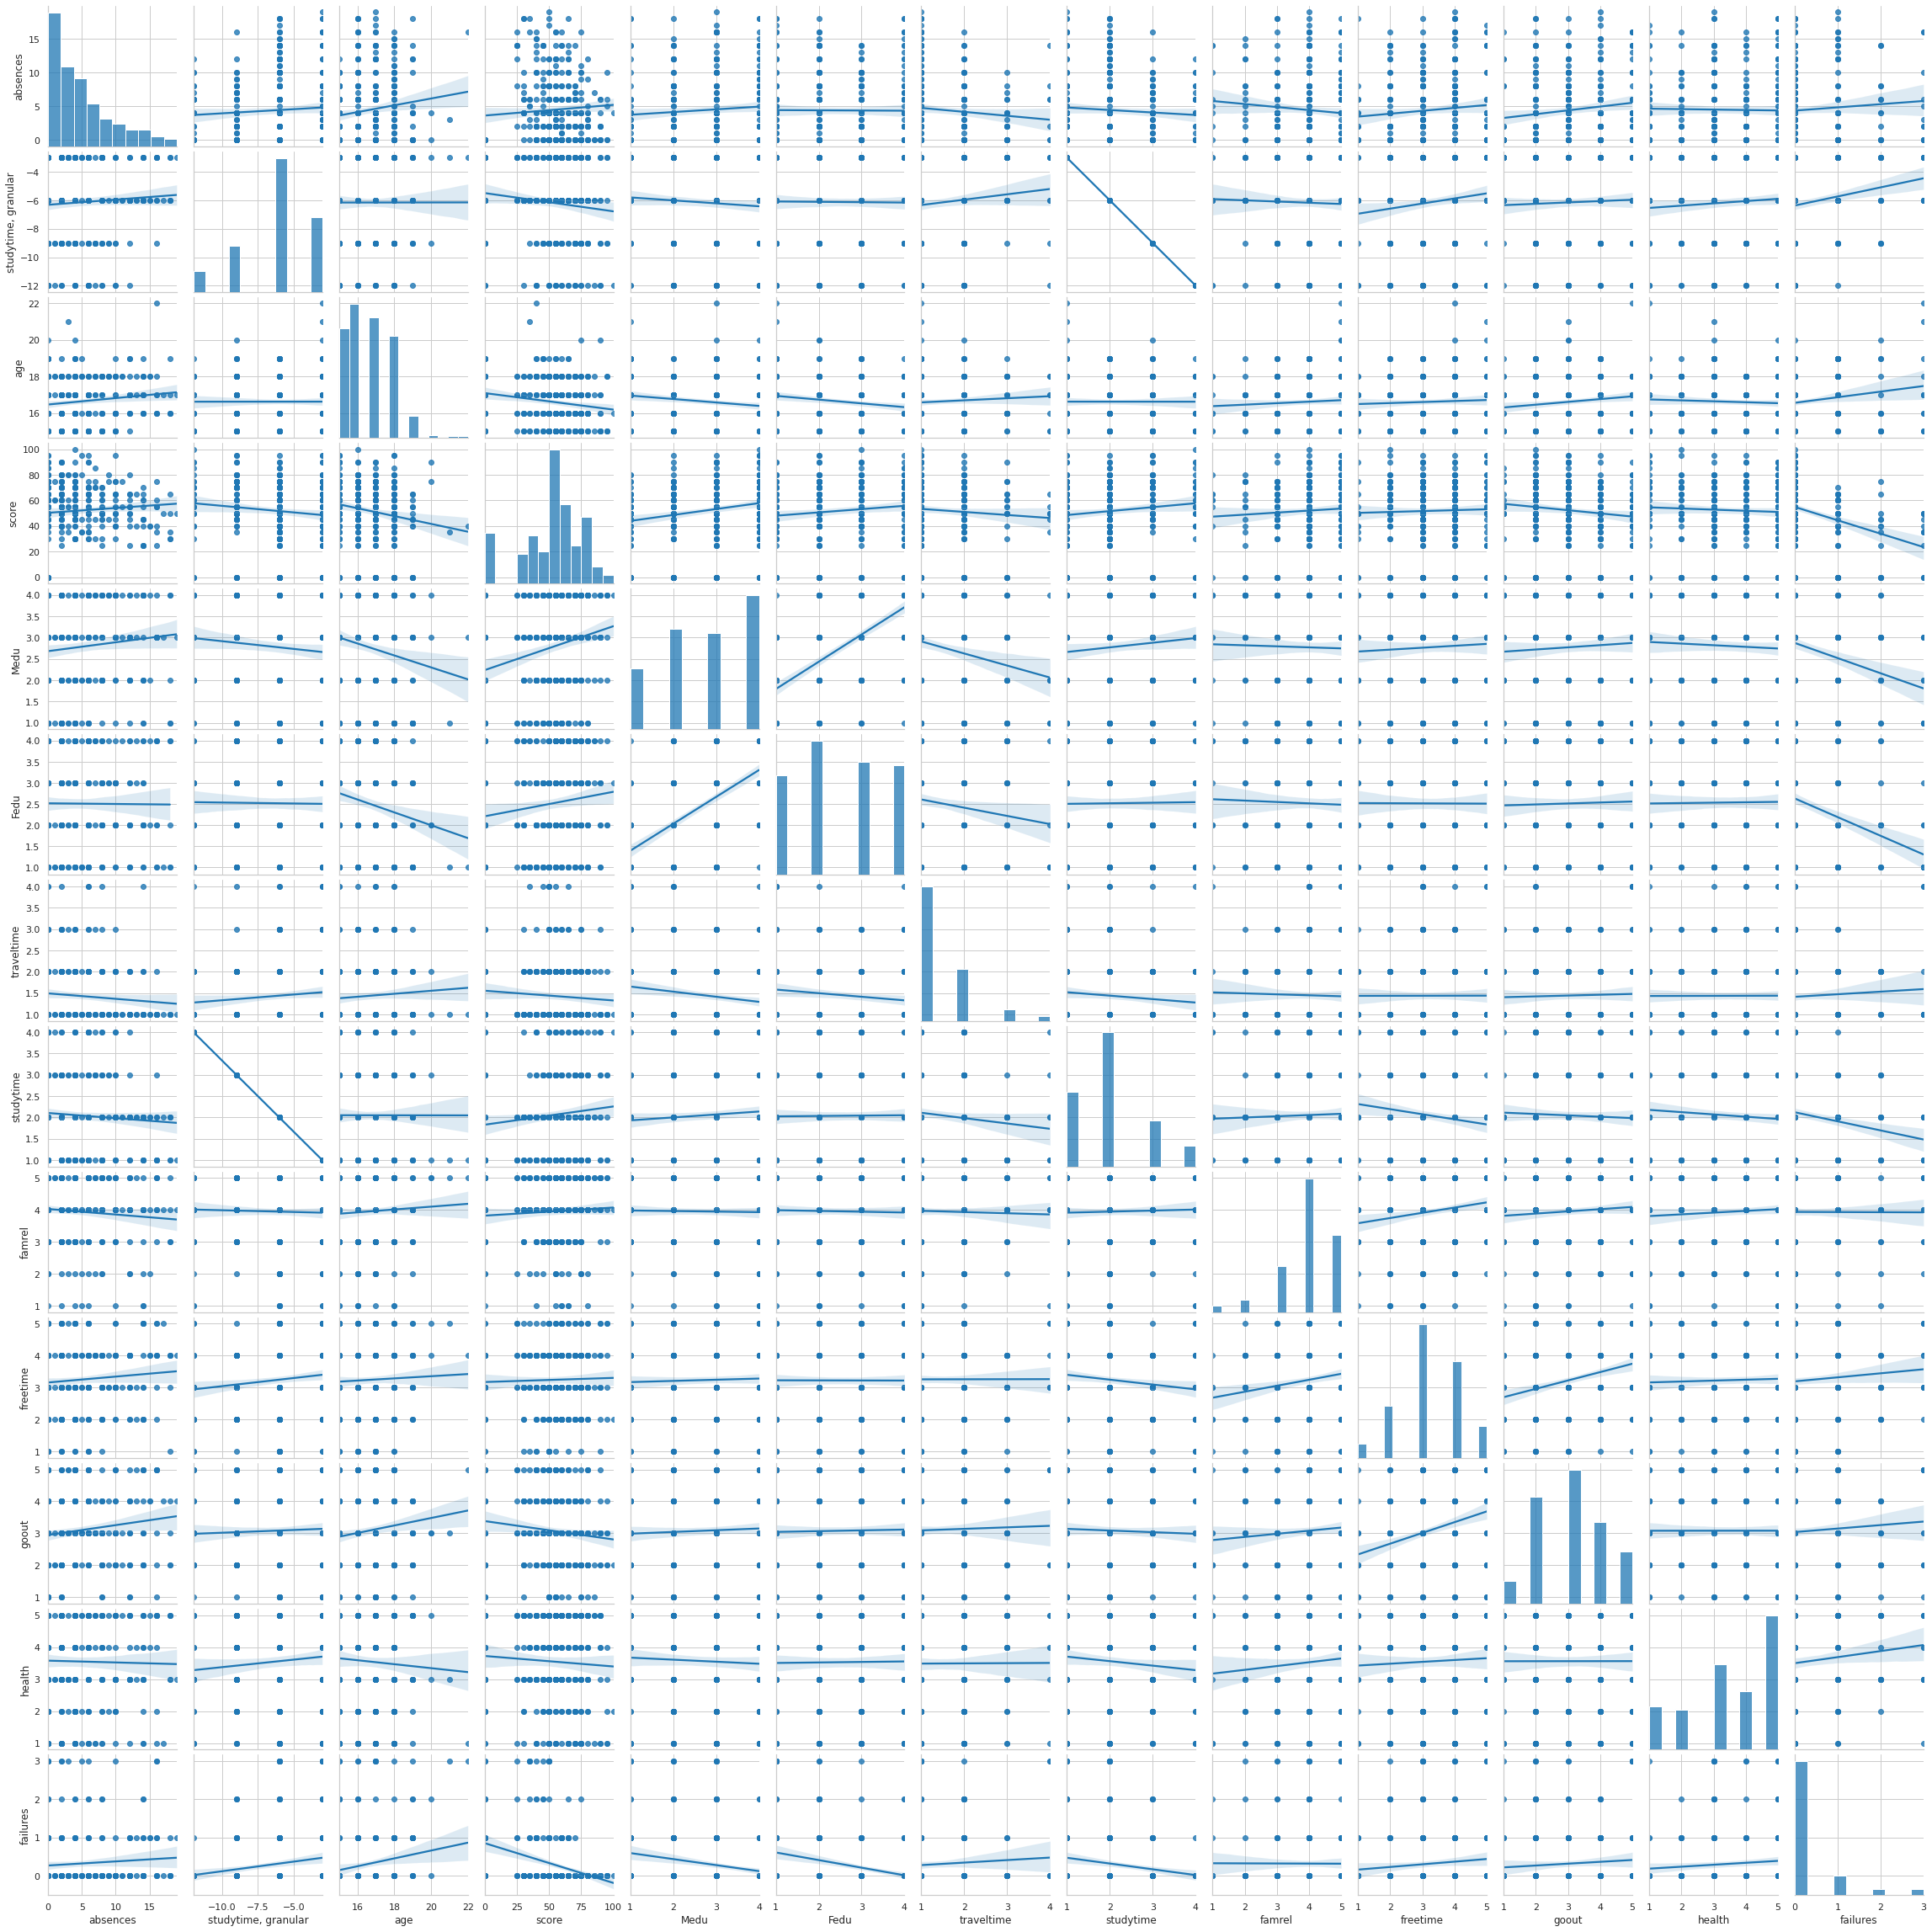

In [44]:
sns.pairplot(students[quan_features+cat_ord_ls], kind = 'reg')
plt.show()

In [45]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.162559,-0.177336,0.062893,-0.000659,0.177371,0.000659,0.060275,0.043224,0.133568,-0.056121,0.133498,-0.166284
Medu,-0.162559,1.000000,0.639039,-0.183786,0.086671,-0.236729,-0.086671,-0.020324,0.040621,0.052498,-0.049415,0.091527,0.218468
Fedu,-0.177336,0.639039,1.000000,-0.128229,0.010711,-0.297078,-0.010711,-0.028029,-0.002908,0.023641,0.012302,-0.007152,0.122439
traveltime,0.062893,-0.183786,-0.128229,1.000000,-0.100737,0.062962,0.100737,-0.029358,0.001519,0.030346,0.003345,-0.086609,-0.073755
studytime,-0.000659,0.086671,0.010711,-0.100737,1.000000,-0.179233,-1.000000,0.030511,-0.134825,-0.040611,-0.086649,-0.067155,0.114856
failures,0.177371,-0.236729,-0.297078,0.062962,-0.179233,1.000000,0.179233,-0.003534,0.093575,0.072740,0.098319,0.071433,-0.330130
"studytime, granular",0.000659,-0.086671,-0.010711,0.100737,-1.000000,0.179233,1.000000,-0.030511,0.134825,0.040611,0.086649,0.067155,-0.114856
famrel,0.060275,-0.020324,-0.028029,-0.029358,0.030511,-0.003534,-0.030511,1.000000,0.174626,0.082144,0.080041,-0.088293,0.063315
freetime,0.043224,0.040621,-0.002908,0.001519,-0.134825,0.093575,0.134825,0.174626,1.000000,0.296558,0.040310,0.089239,0.030279
goout,0.133568,0.052498,0.023641,0.030346,-0.040611,0.072740,0.040611,0.082144,0.296558,1.000000,0.000562,0.132140,-0.119548


Из графиков и корреляционной матрицы видно, что переменные studytime и studytime, granular полностью коррелируют. Выбросим studytime, granular, она и непонятная, и не нужна

In [46]:
students = students.drop(columns = 'studytime, granular')
students_nozeros = students_nozeros.drop(columns = 'studytime, granular')
quan_features.remove('studytime, granular')

**_Весь дальнейший анализ будет проводиться в первую очередь для выборки, из которой отборошены нулевые значения score._**

***
## 4.2. Влияние качественных номинативных переменных на оценку.

Определим функции для вывода различных видов графиков распеределния целевой переменной в зависимости от качественной.

In [47]:
def get_boxplot(dataframe, qual_par, nom_par):
    '''
    Функция строит "ящик с усами" для распределения количественного параметра qual_par в зависимости от качественной переменной
    nom_par в датафрейме dataframe
    '''
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(data = dataframe,
                x=nom_par, y=qual_par, 
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Ящик с усами для переменной ' + nom_par)
    plt.show()
    
    
# Violin plot может быть полезен для визуальной корреляции качественных переменных с целевой.    
def get_violinplot(dataframe, qual_par, nom_par):
    '''
    Функция строит violin plot для распределения количественного параметра qual_par в зависимости от качественной переменной
    nom_par в датафрейме dataframe
    '''
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.violinplot(data = dataframe,
                x=nom_par, y=qual_par, 
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Violin plot для переменной ' + nom_par)
    plt.show()
    

def get_histplot(dataframe, qual_par, hue = None):
    '''
    Функция строит гистограмму для распределения количественного параметра qual_par в зависимости от качественной переменной
    nom_par в датафрейме dataframe. 
    hue - качественная переменная из dataframe, по которой будет проводиться дифференциация, по умолчанию None
    '''
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.histplot(data = dataframe, x=qual_par, hue=hue,  
                 ax=ax, legend = True, multiple = 'dodge', shrink = 0.8)
    plt.xticks(rotation=45)
    ax.set_title('Гистограмма для переменной ' + qual_par)
    plt.show()

Посмотрим на влияние номинативных переменных на результаты экзамена.

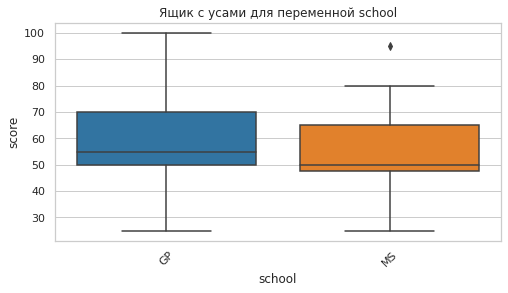

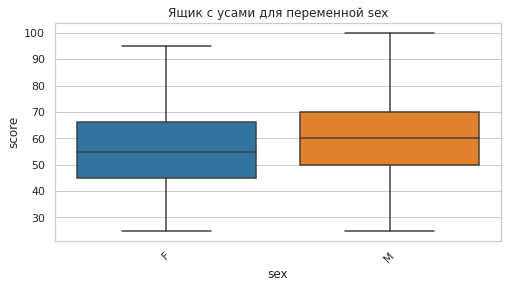

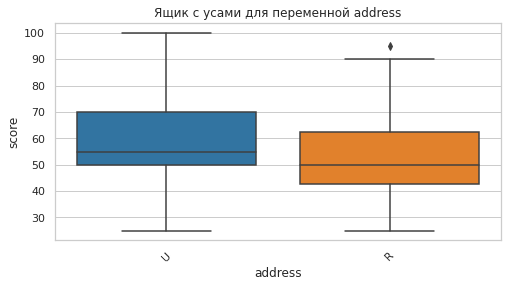

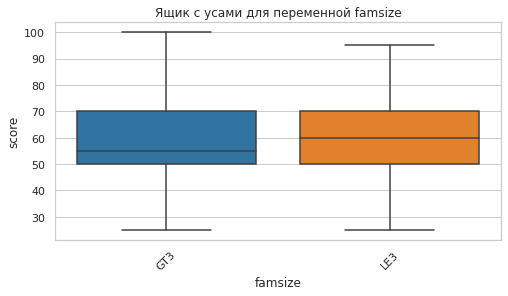

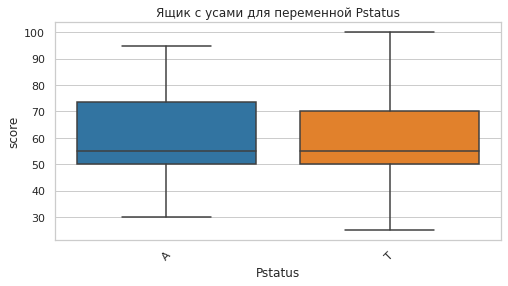

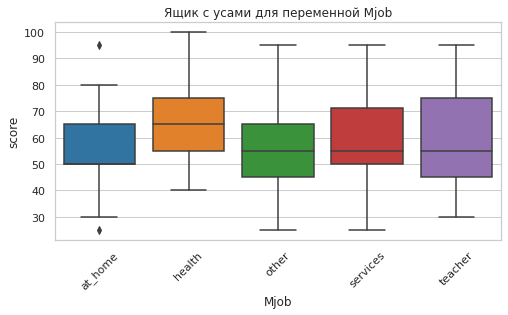

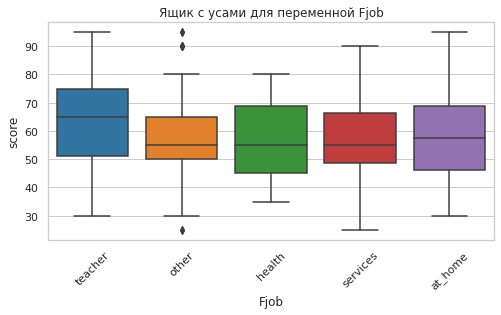

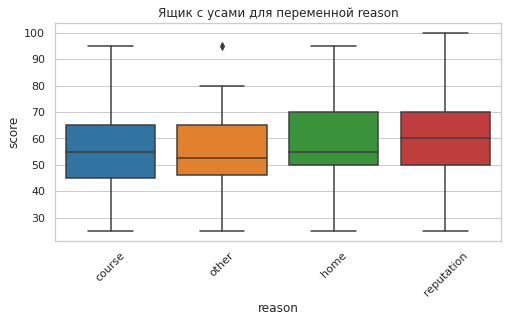

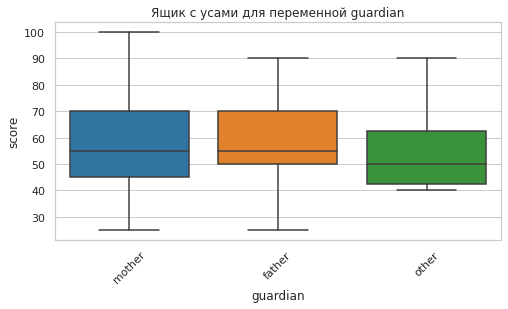

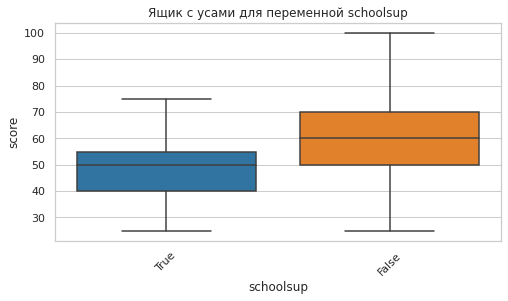

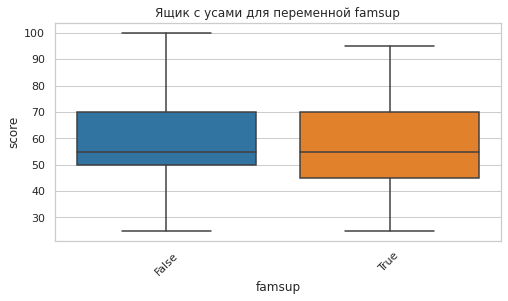

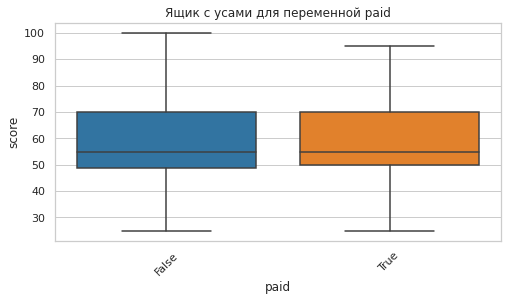

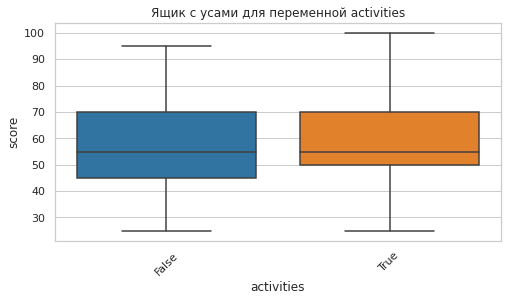

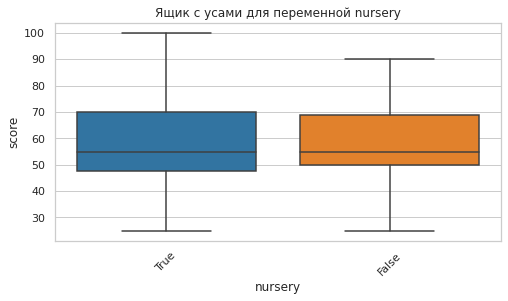

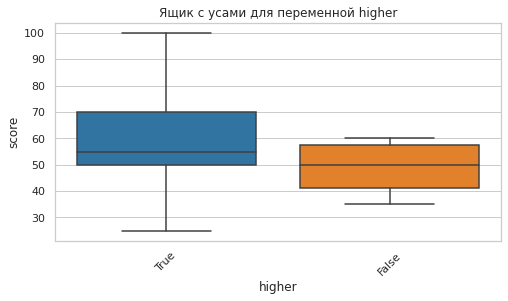

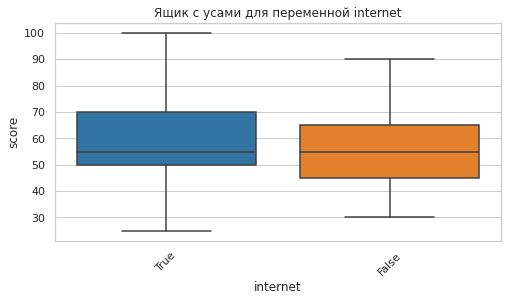

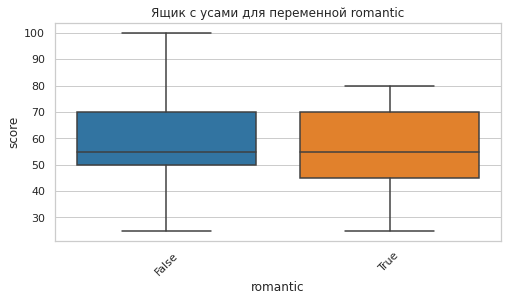

In [48]:
for col in cat_nom_ls:
    get_boxplot(students_nozeros, 'score', col)

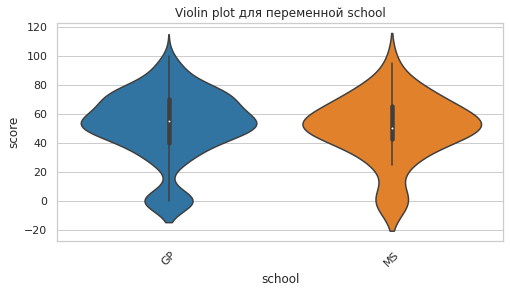

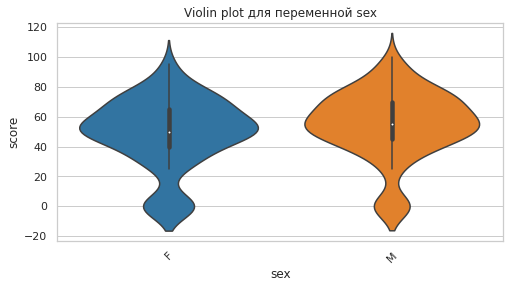

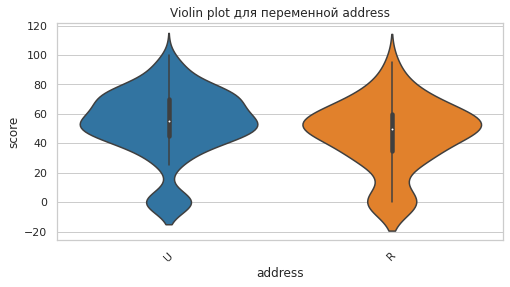

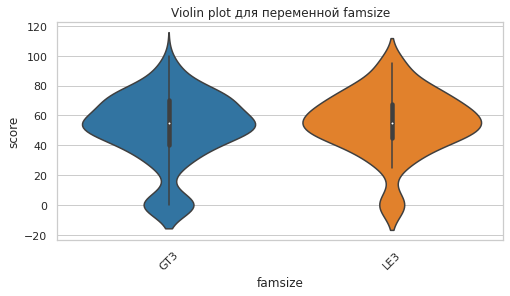

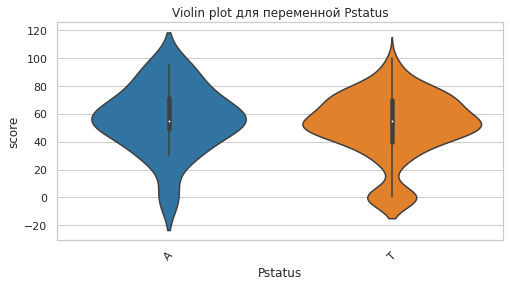

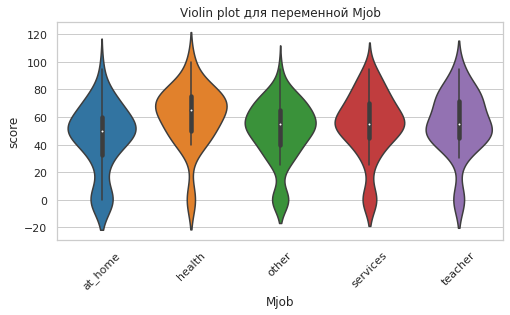

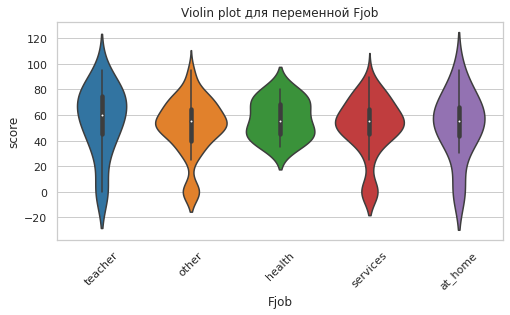

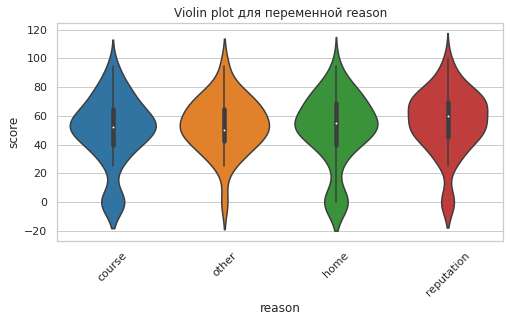

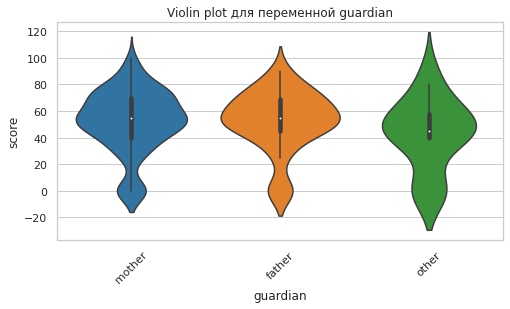

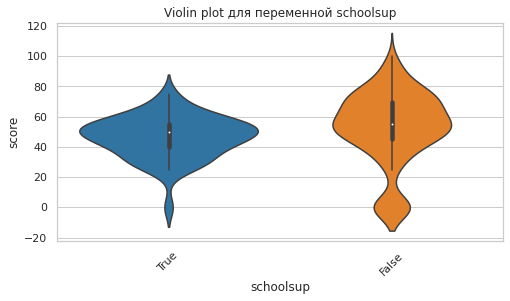

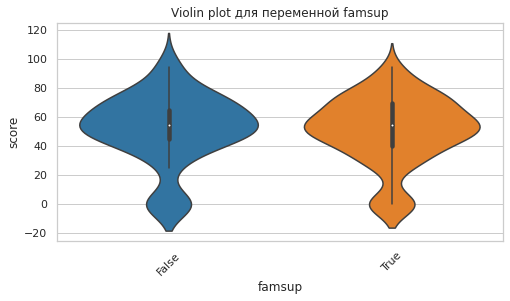

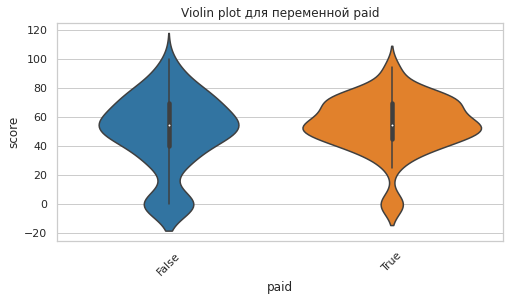

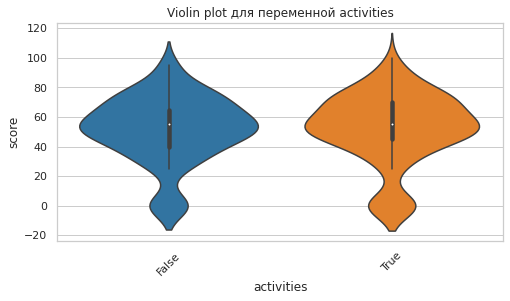

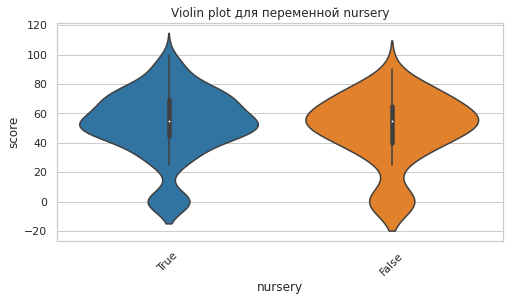

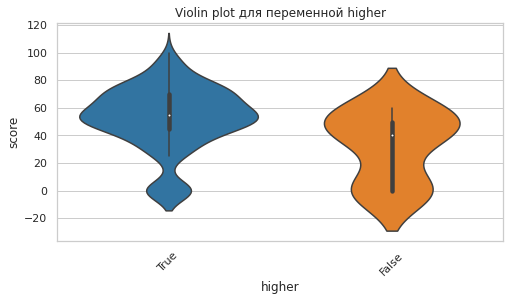

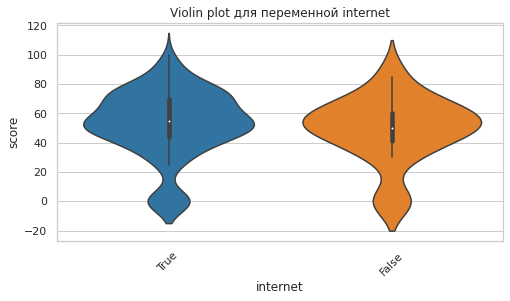

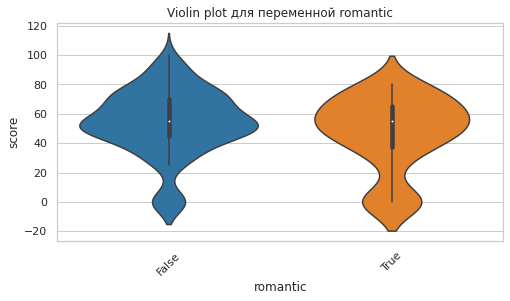

In [49]:
for col in cat_nom_ls:
    get_violinplot(students, 'score', col)

Оценка "глазом" говорит о том, что в той или иной степени все параметры влияют на результат экзаменов. Посмотрим на статистическую значимость.

In [50]:
def get_stat_dif(dataframe, nom_var, quan_var, alpha):
    '''
    Функция проводит T-тест (тест Стьюдента) для определения схожести распределений.
    dataframe - фрейм, для серий которого будет тест
    quan_var - количественная переменная, распределение которой исследуем
    nom_var - качественная переменная, влияние значений которой на распределение количественной
    переменной исследуем
    alpha - статистическая значимость
    
    Поскольку количественная величина одна и та же, то принимаем допущение о том, что её
    дисперсия одинакова для всех выборок с разными значениями качественной переменной.
    Гипотеза - для различных значений качественной переменной распределения количественной идентичны.
    Дисперсию мы приняли одинаковой, поэтому проверка идёт только для средних значений.
    Если p-value получается меньше статистической значимости, то гипотеза отвергается и принимается альтернативная,
    т.е. различные значения качественной переменной получаются различные распределения количественной, то
    есть качетсвенная переменная влияет на количественную.
    '''
    cols = dataframe[nom_var].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if (
            scipy.stats.ttest_ind(
                dataframe.loc[dataframe[nom_var] == comb[0], quan_var], 
                dataframe.loc[dataframe[nom_var] == comb[1], quan_var]).pvalue 
                <= alpha/len(combinations_all)
           ):
            print('Найдены статистически значимые различия для качественной переменной ', nom_var)
            return nom_var
        
        
# создадим на будушее список переменных, которые влияют на целевую
cat_nom_ls_rem = []
for col in cat_nom_ls:
    res = get_stat_dif(students_nozeros, col, 'score', 0.05)
    if res is not None:
        cat_nom_ls_rem.append(res)

Найдены статистически значимые различия для качественной переменной  sex
Найдены статистически значимые различия для качественной переменной  address
Найдены статистически значимые различия для качественной переменной  Mjob
Найдены статистически значимые различия для качественной переменной  schoolsup


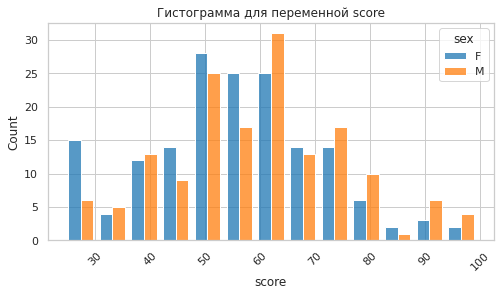

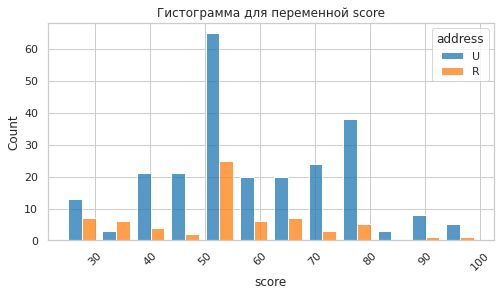

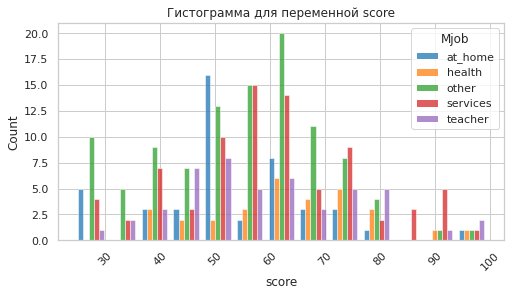

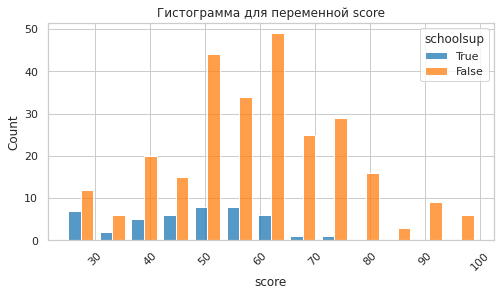

In [51]:
for var in cat_nom_ls_rem:
    get_histplot(students_nozeros, 'score', hue = var)

Интересно, а что там с выборкой, в которую включены нулевые значения?

In [52]:
cat_nom_ls_rem_zeros = []
for col in cat_nom_ls:
    res = get_stat_dif(students, col, 'score', 0.05)
    if res is not None:
        cat_nom_ls_rem_zeros.append(res)

Найдены статистически значимые различия для качественной переменной  sex
Найдены статистически значимые различия для качественной переменной  address
Найдены статистически значимые различия для качественной переменной  Mjob
Найдены статистически значимые различия для качественной переменной  paid
Найдены статистически значимые различия для качественной переменной  higher
Найдены статистически значимые различия для качественной переменной  romantic


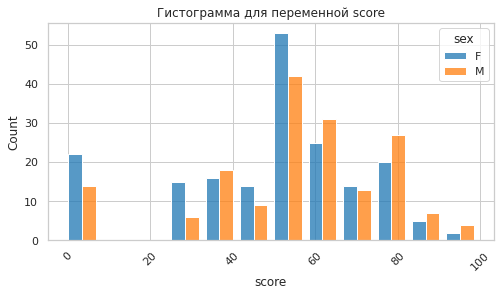

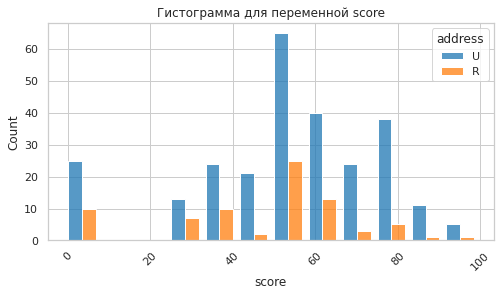

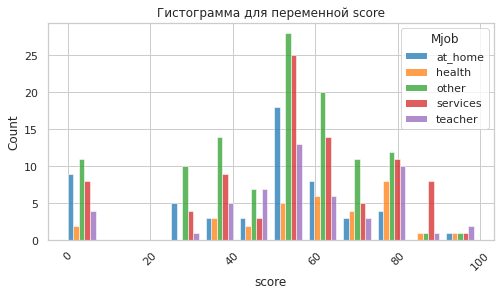

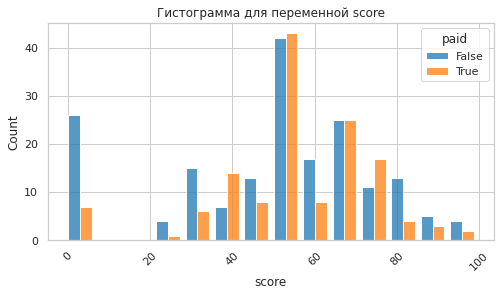

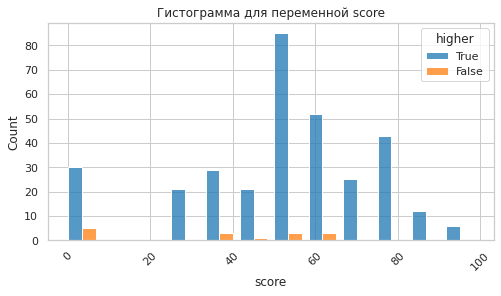

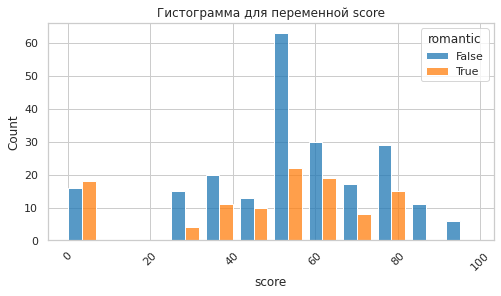

In [53]:
for var in cat_nom_ls_rem_zeros:
    get_histplot(students, 'score', hue = var)

Получается, что на распределение с нулевыми значениями влияют больше качественных переменных.

Поскольку основной для нас является выборка, не включающая нулевые значения результата, то принято решение оставить переменные согласно списку cat_nom_ls_rem.

***
## 4.3. Влияние качественных полуколичественных переменных на оценку.

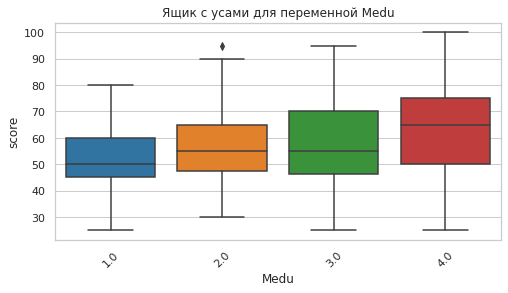

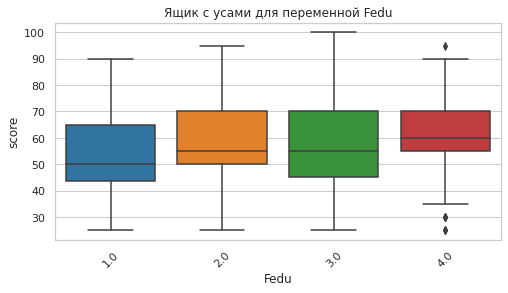

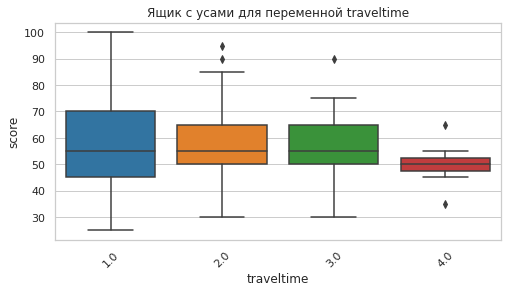

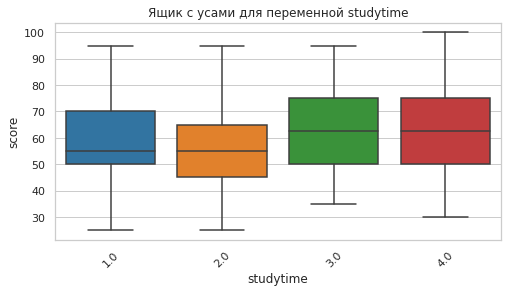

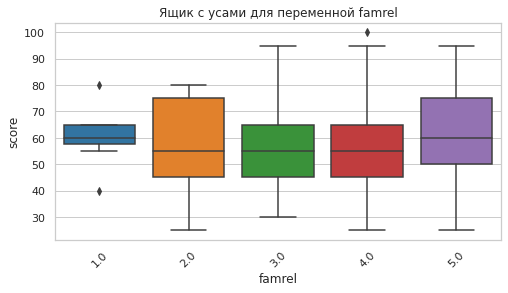

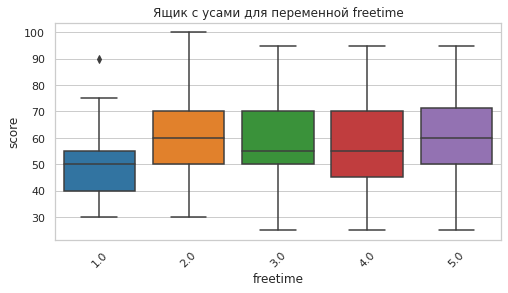

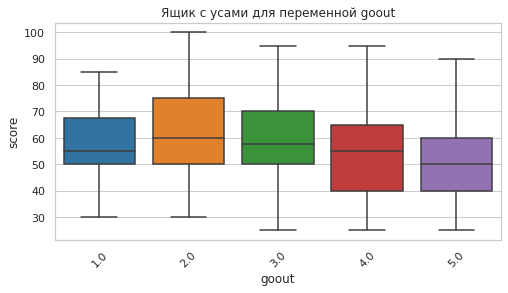

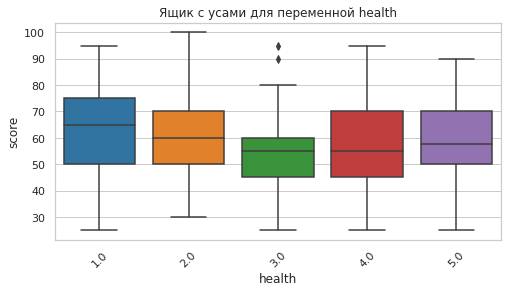

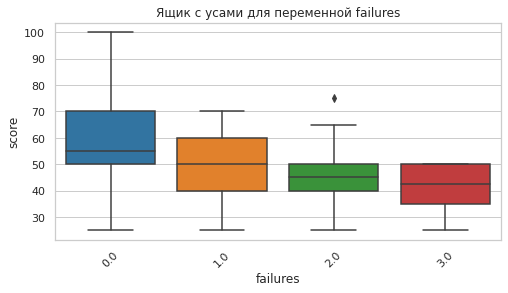

In [54]:
for col in cat_ord_ls:
    get_boxplot(students_nozeros, 'score', col)

Ситуация аналогична номинативным переменным, похоже что почти все влияют. Посмотрим на статистические тесты.

In [55]:
cat_ord_ls_rem = []
for col in cat_ord_ls:
    res = get_stat_dif(students_nozeros, col, 'score', 0.05)
    if res is not None:
        cat_ord_ls_rem.append(res)

Найдены статистически значимые различия для качественной переменной  Medu
Найдены статистически значимые различия для качественной переменной  Fedu
Найдены статистически значимые различия для качественной переменной  studytime
Найдены статистически значимые различия для качественной переменной  goout
Найдены статистически значимые различия для качественной переменной  failures


In [56]:
cat_ord_ls_rem_zeros = []
for col in cat_ord_ls:
    res = get_stat_dif(students, col, 'score', 0.05)
    if res is not None:
        cat_ord_ls_rem_zeros.append(res)

Найдены статистически значимые различия для качественной переменной  Medu
Найдены статистически значимые различия для качественной переменной  failures


А вот результат обратный. Если удалить из выборки нули, то она результат становится более чувствительным к изменению переменных.

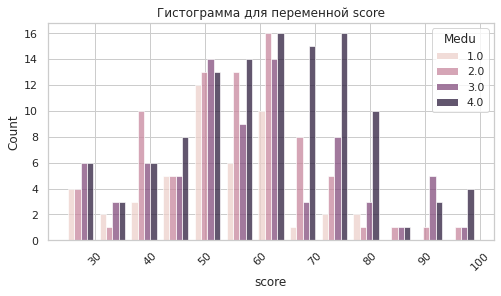

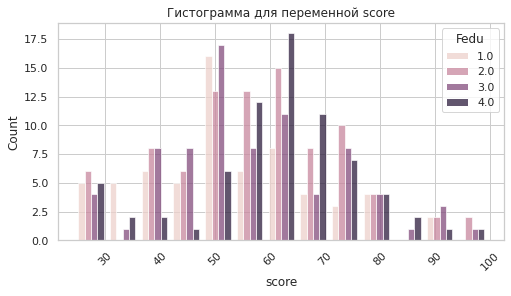

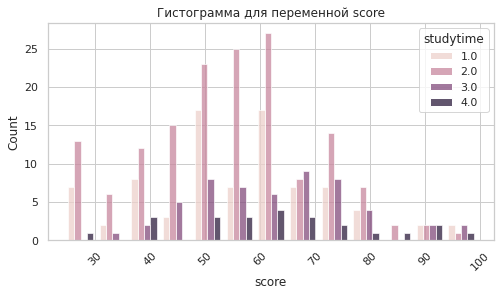

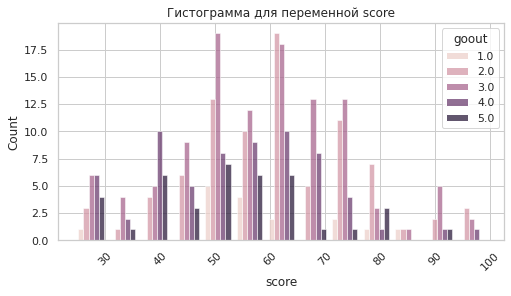

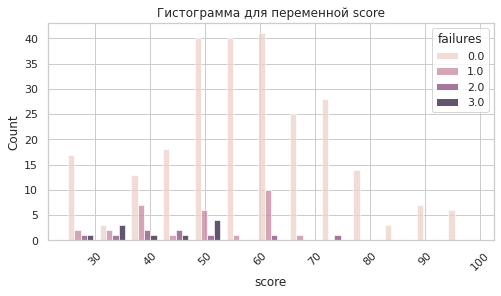

In [57]:
for var in cat_ord_ls_rem:
    get_histplot(students_nozeros, 'score', hue = var)

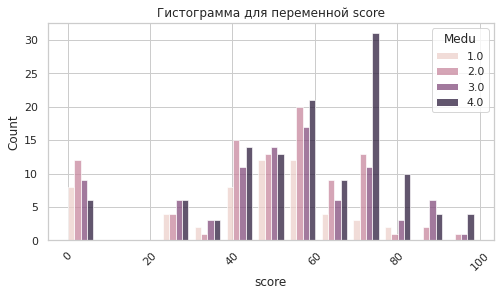

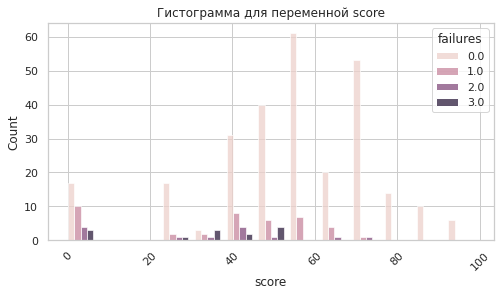

In [58]:
for var in cat_ord_ls_rem_zeros:
    get_histplot(students, 'score', hue = var)

*******
## 4.4. Влияние количественных переменных на оценку.

На самом деле заранее можно сказать, что количественные переменные не сильно влияют на целевую переменную score, потому что как было показано выше, **сама целевая переменная распределена нормально (если выкинуть нули), а остальные количественные переменные - нет.** На всякий случай проверим оба варианта score, с учётом нулевых баллов и без.

Выведем pairplot для количественных переменных

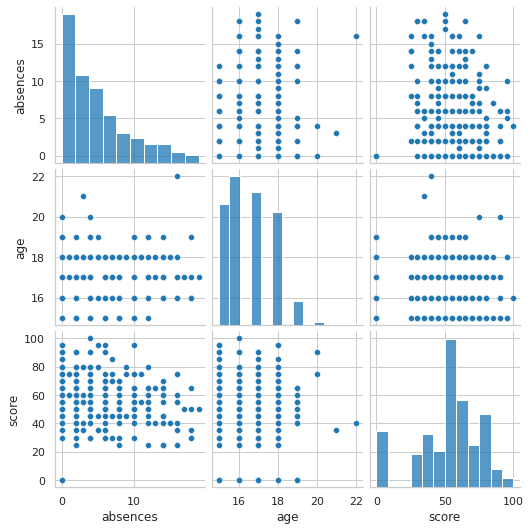

In [59]:
sns.pairplot(students[quan_features])
plt.show()

Явная корреляция отсутствует. Проверим коэффициентом корреляции Пирсона (хотя на самом деле мы делаем примерно то же самое, что делали при проверке на нормальность, поэтому ответ заранее известен)

In [60]:
for pair in combinations(quan_features, 2):
    pearson = scipy.stats.pearsonr(students_nozeros[pair[0]], students_nozeros[pair[1]])
    print(f'Коэффициент корреляции Пирсона пары {pair} равен {pearson[0]}')

Коэффициент корреляции Пирсона пары ('absences', 'age') равен 0.18792781181702978
Коэффициент корреляции Пирсона пары ('absences', 'score') равен -0.256869780030887
Коэффициент корреляции Пирсона пары ('age', 'score') равен -0.13806927698247468


Сильная связь переменных отсутствует. Тем не менее со слабой связью можно утверждать, что поскольку к-ты корреляции для возраста и количества пропусков отрицательные, то более молодые студенты, пропустившие меньше занятий имеют шанс на лучшую оценку. 
Однако поскольку все параметры, кроме score распределены не нормально, сильной корреляции ожидать не стоит.
Посмотрим на случай с нулевыми значениями результатов теста.

In [61]:
for pair in combinations(quan_features, 2):
    pearson = scipy.stats.pearsonr(students[pair[0]], students[pair[1]])
    print(f'Коэффициент корреляции Пирсона пары {pair} равен {pearson[0]}')

Коэффициент корреляции Пирсона пары ('absences', 'age') равен 0.1334979468404919
Коэффициент корреляции Пирсона пары ('absences', 'score') равен 0.07731739832201424
Коэффициент корреляции Пирсона пары ('age', 'score') равен -0.16628432414866592


Забавный эффект наблюдается - коэффициент корреляции между score и absences хоть и близок к нулю, но положителен, но есть с минимальной уверенностью, но можно утверждать что чем больше студент занятий пропустил, тем лучше у него оценка.


В заключение оставим в фрейме только колонки, связь которых с оценкой доказана.

In [62]:
students_nozeros = students_nozeros[cat_nom_ls_rem + cat_ord_ls_rem + ['score']]
students_nozeros.head()

,sex,address,Mjob,schoolsup,Medu,Fedu,studytime,goout,failures,score
0,F,U,at_home,True,4.0,4.0,2.0,4.0,0.0,30.0
1,F,U,at_home,False,1.0,1.0,2.0,3.0,0.0,30.0
2,F,U,at_home,True,1.0,1.0,2.0,2.0,3.0,50.0
3,F,U,health,False,4.0,2.0,3.0,2.0,0.0,75.0
4,F,U,other,False,3.0,3.0,2.0,2.0,0.0,50.0


In [63]:
students = students[cat_nom_ls_rem_zeros + cat_ord_ls_rem_zeros + ['score']]
students.head()

,sex,address,Mjob,paid,higher,romantic,Medu,failures,score
0,F,U,at_home,False,True,False,4.0,0.0,30.0
1,F,U,at_home,False,True,False,1.0,0.0,30.0
2,F,U,at_home,None,True,None,1.0,3.0,50.0
3,F,U,health,True,True,True,4.0,0.0,75.0
4,F,U,other,True,True,False,3.0,0.0,50.0


**********
# Раздел 5. Выводы.

По результатам разведывательного анализа данных можно сделать следующие выводы:
1. Качество данных хорошее. В некоторых строках по некоторым данным были NaN, а пустых строк не было.
2. Для качественных номинативных переменных, принимающих значения Yes\No они были заменены на True\False. Это сделано больше на всякий случай, чтобы была возможность, например, просто посчитать количество положительных ответов при помощи применения sum() к столбцу.
3. Некоторые значения полуколичественных переменных выходили за рамки установленной "шкалы", они были притянуты к крайним значениям этой шкалы. При этом в некоторых случаях вполне допустимые значения для полуколичественных переменных получались выбросами. И тем не менее необходимости в устранении этих выбросов по формальным поводам не вижу, их значения вполне допустимы и картины не портят.
4. Проведён осмотр и анализ количественных переменных, пустых значений нет. В переменной absences обнаружены и устранены выбросы (огромные значения для пропущенных студентами занятий), в остальных переменных выбросов нет. Переменная studytime, granular на данном этапе не рассматривалась. Пустые значения в других строках удалялись.
5. Переменная score - ключевая в этом фрейме, поскольку далее имеет смысл рассматривать влияние остальных переменных на неё. У этой переменной нет выбросов, но есть значения NaN, которые мы удалили, поскольку присваивание им какого-либо значения (например, моды) не имеет обоснования.
6. В переменной score подозрительно много значений 0 (36 штук), при этом следующие после нуля значения - это 25. К тому же от этой величины мы ожидаем нормального распределения (центральная предельная теорема), но с этими нулями это распределение не является нормальным. Возможно, нулём также считается неявка студента на экзамен, или это просто могут быть мусорные данные. Или все результаты ниже 25 баллов были проставлены нулём. Здесь у нас не хватает данных, чтобы сказать, почему нулей так много, и трактовка нулей именно как нулей может быть некорректна. Поэтому мы эти рассмотрели два случая - с отбрасыванием этих нулей и без, считая за основной случай именно отброшенные нули. 
7. После этого были проведены визуальная оценка и исследование влияния качественных номинативных и полуколичественных переменных на score. Установлено, что на score с отброшенными нулями влияют переменные:
    - sex - пол
    - address - место жительства
    - Mjob - работа матери
    - schoolsup - дополнительная образовательная поддержка
    - Medu - образование матери
    - Fedu - образование отца
    - studytime - время на учёбу помимо школы
    - goout - время, проведённое с друзьями
    - failures - количество прошлых неудачных попыток
   Выглядит очень логично.
   Eсли нули не отбрасывать, картина несколько меняется:
    - sex - пол
    - address - место жительства
    - Mjob - работа матери
    - paid - дополнительные платные занятие по математике
    - higher - хочет ли студент получить высшее образование
    - romantic - состоит ли в романтических отношениях
    - Medu - образование матери
    - failures - количество прошлых неудачных попыток
8. Переменная studytime, granular не была описана в задании на проект, и было определено, что она полностью коррелирует с переменной studytime, только корреляция обратная. Эту переменную можно просто отбросить, не думая даже что она значит.
9. Сильной корреляции количественных признаков и результата экзамена не выявлено. Есть слабая корреляция: более молодые студенты, пропустившие меньше занятий имеют шанс на лучшую оценку. Но корреляция слабая.
10. Для будущей модели будут использоваться признаки sex, address, Mjob, schoolsup, Medu, Fedu, studytime, goout, failures, в качестве предсказываемой переменной - score.
11. Если удастся выяснить природу нулевых оценок и окажется, что нули - это действительно 0 баллов на экзамене, то список переменных будет несколько иной: sex, address, Mjob, paid, higher, romantic, Medu, failures для всё той же score.